# Nek5000: CG and DG with scalar and vector implementations

## Imports and helper function to read data

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os.path

In [2]:
def readdata(fname, nx1s=18):
    mean = np.zeros(nx1s)
    std = np.zeros(nx1s)
    nsample = np.zeros(nx1s)
    
    # nelt, np, nx1, totallt, time
    with open(fname, 'r') as file:
        oldnx1 = 3
        tlist = []
        for line in file:
            nx1 = int(line.split()[2])
            time = float(line.split()[-1])
            
            if nx1 == oldnx1:
                tlist.append(time)
            else:
                if len(tlist) > 0:
                    mean[oldnx1-3] = np.mean(tlist)
                    std[oldnx1-3] = np.std(tlist)
                else:
                    mean[oldnx1-3] = np.nan
                    std[oldnx1-3] = np.nan
                tlist = []
                tlist.append(time)
                oldnx1 = nx1
        mean[nx1-3] = np.mean(tlist)
        std[nx1-3] = np.std(tlist)
        
    return mean, std

def cglabel(cg):
    if cg in ['CGGOO', 'CGGOOO', 'CGGO']:
        return 'o'
    elif cg in ['CGGOV', 'CGGOVV']:
        return 'v'
    elif cg in ['CGGOV0VD', 'CGGOV0']:
        return 'v-0ds'
    elif cg in ['CGGOV1D', 'CGGOV1']:
        return 'v-1ds'
    elif cg in ['CGGOV2D', 'CGGOV2']:
        return 'v-2ds'
    elif cg in ['CGGOV3D', 'CGGOV3']:
        return 'v-3ds'
    elif cg in ['CGGOS', 'CGGOSS']:
        return 's'
    elif cg == 'CGGODG':
        return 'dg-o'
    elif cg == 'CGGODGV':
            return 'dg-v'

## Set a few variable values

In [3]:
# Common
minnx1 = 3
maxnx1 = 20
nx1s = maxnx1 - minnx1 + 1
nelts = 5

# Machine specific
cggo = {'TH':['CGGOO', 'CGGOV', 'CGGOS', 'CGGODG'], 'DQ':['CGGO', 'CGGOV', 'CGGODG', 'CGGODGV']}
nprocs = {'DQ':7, 'TH':15}

## Plots:

/Users/thilina/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


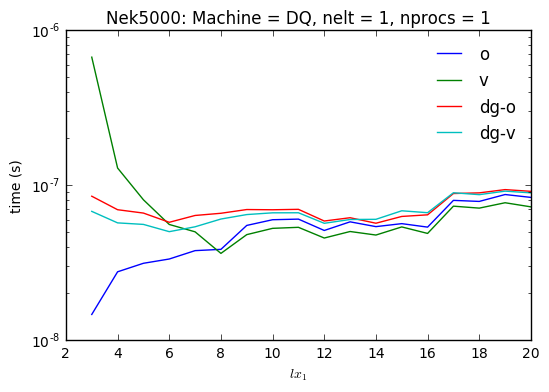

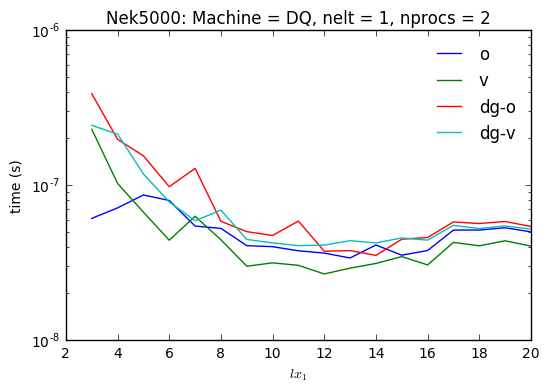

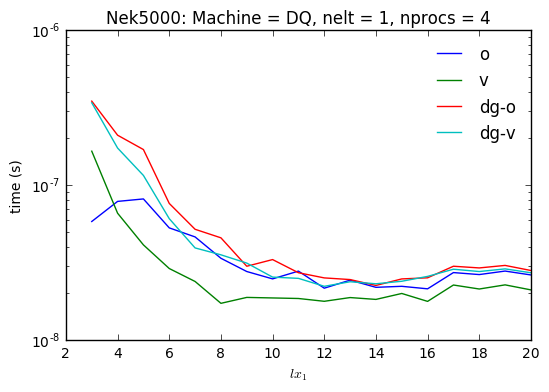

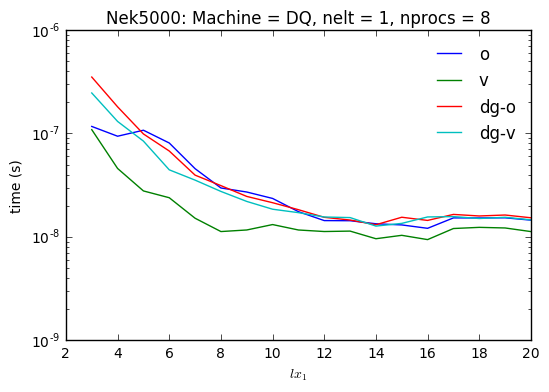

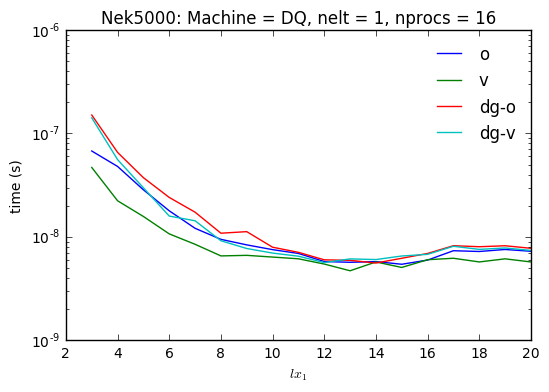

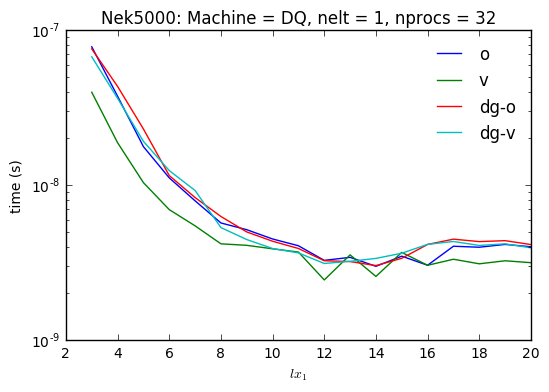

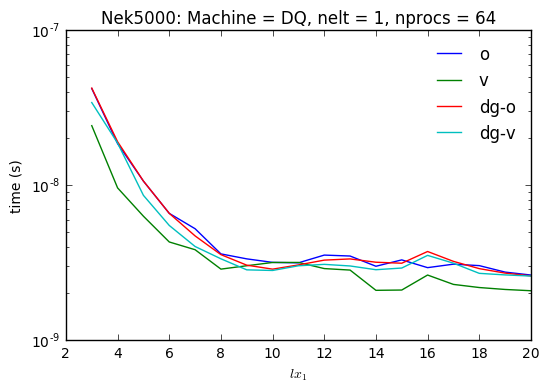

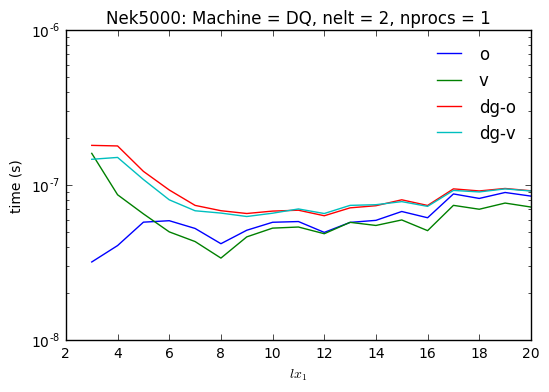

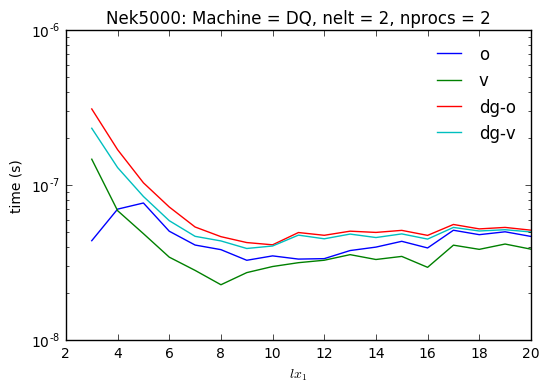

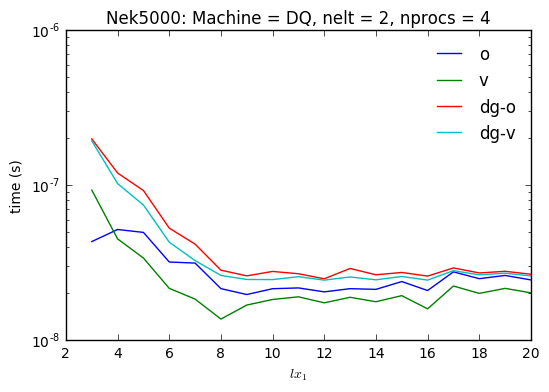

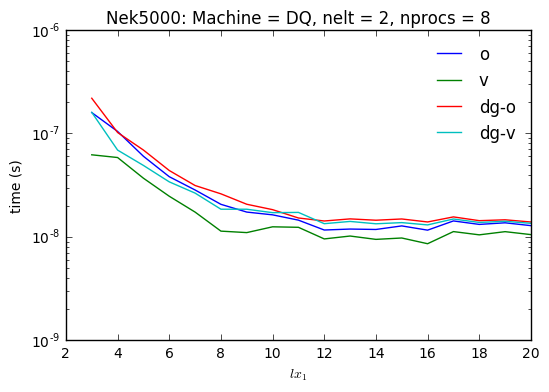

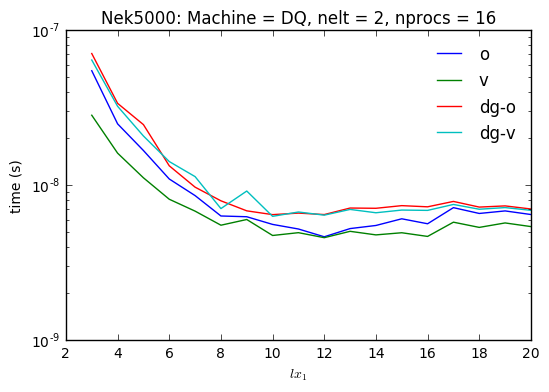

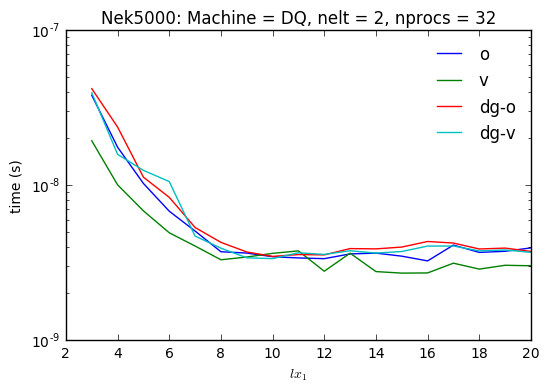

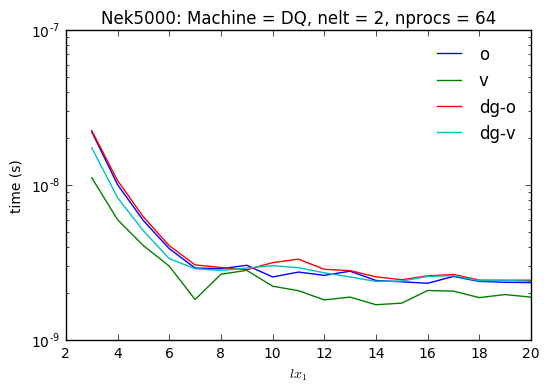

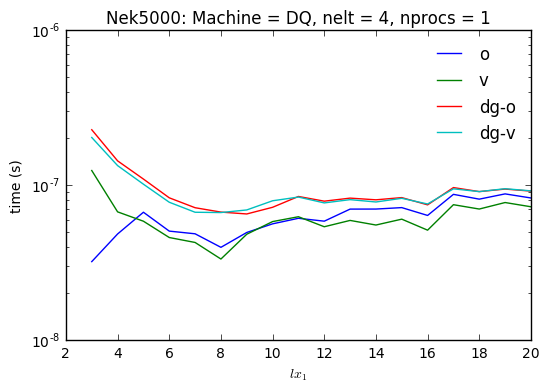

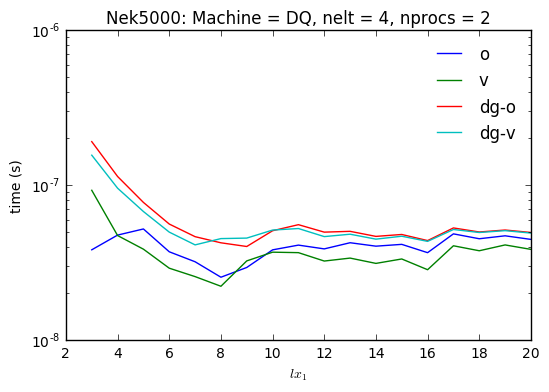

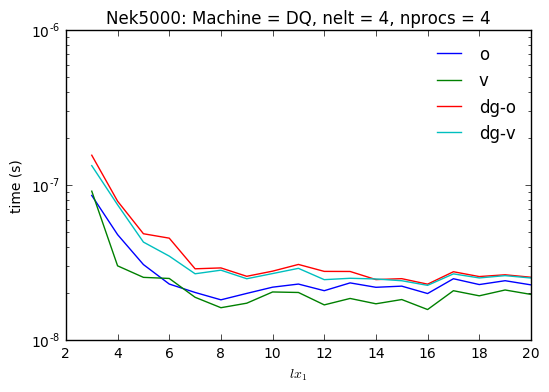

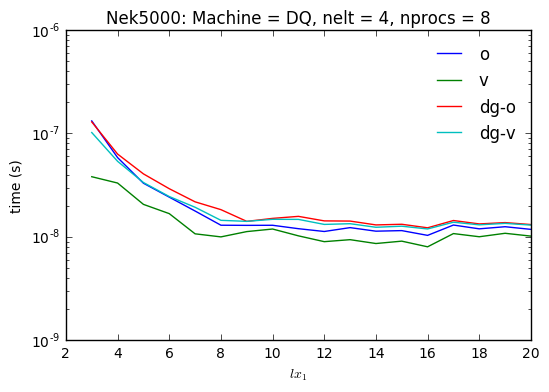

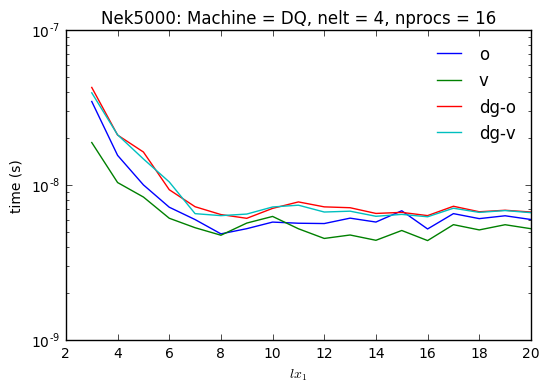

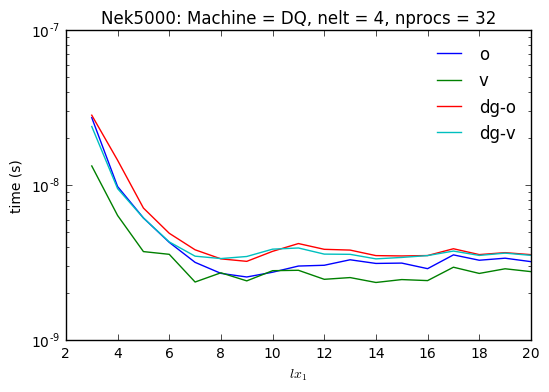

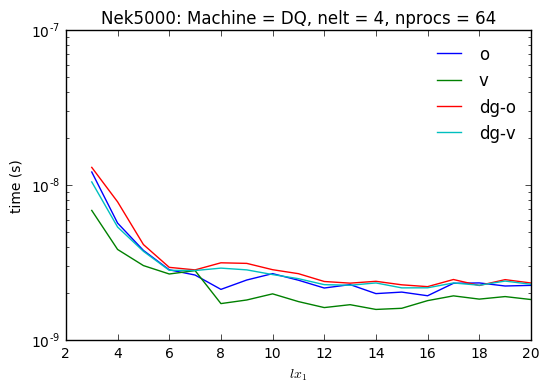

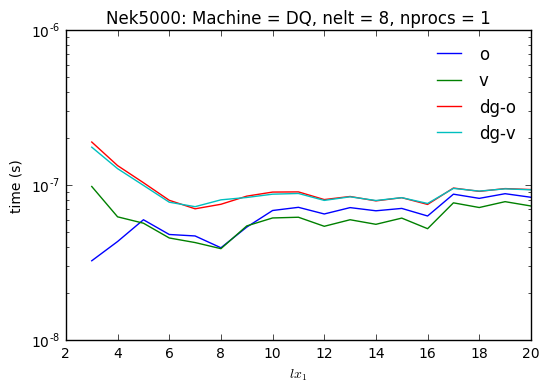

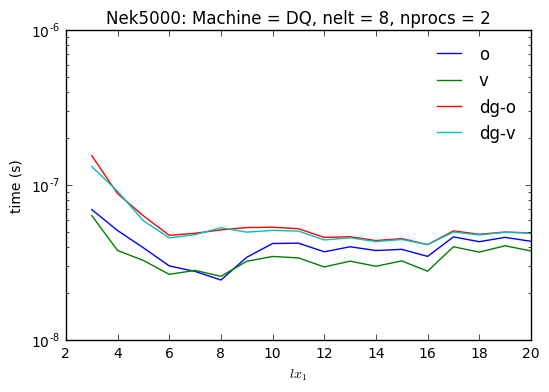

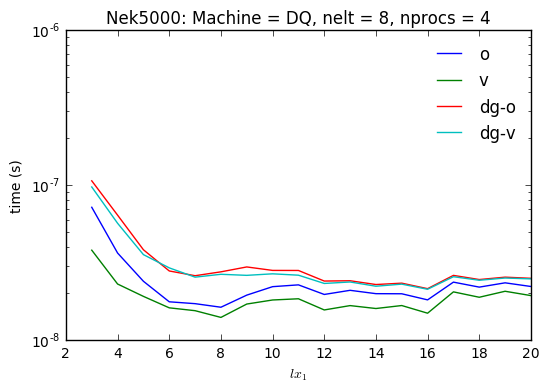

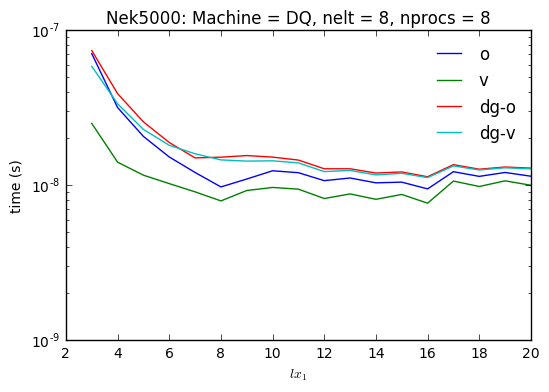

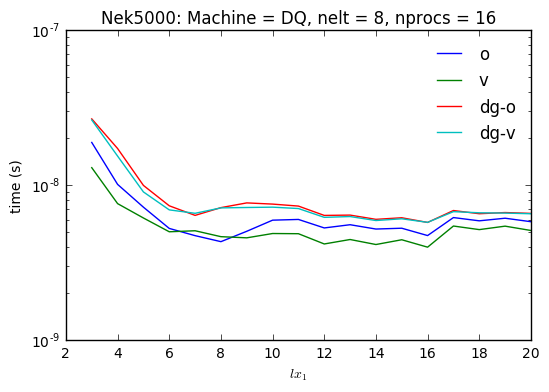

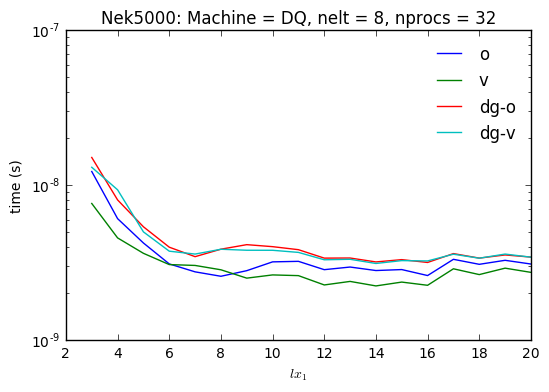

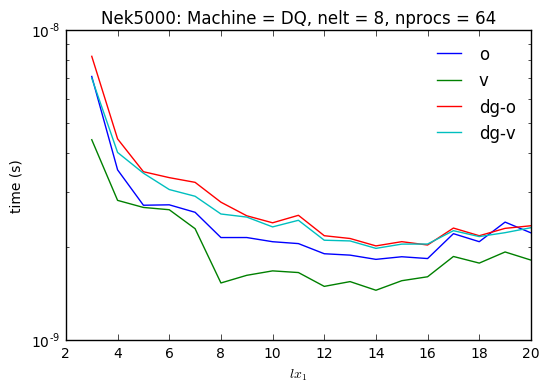

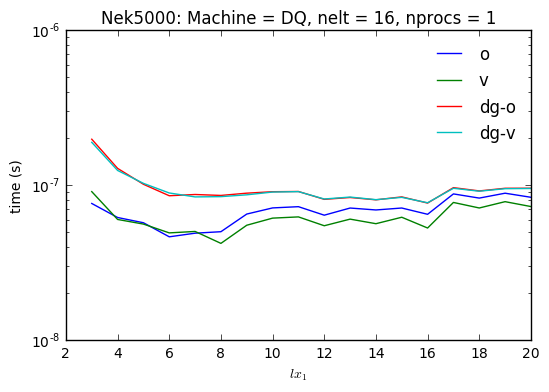

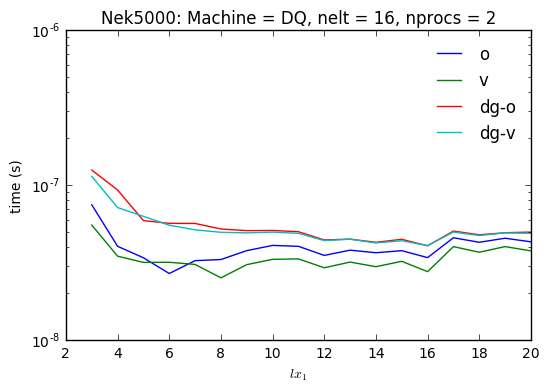

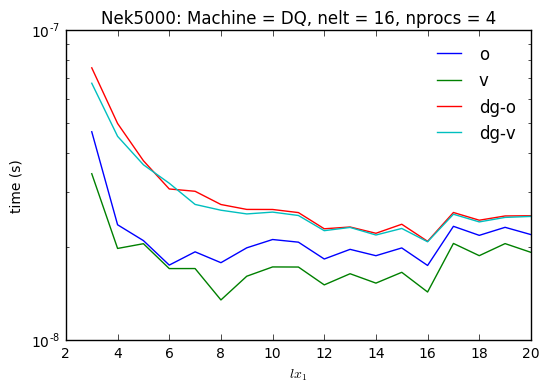

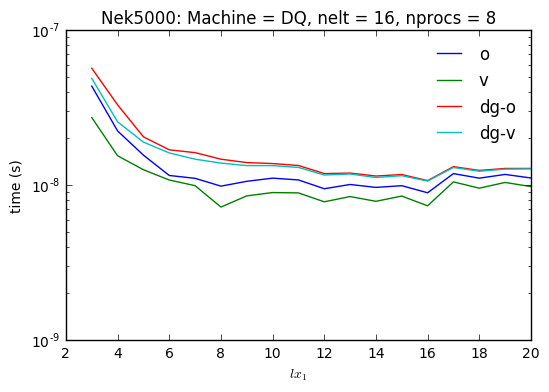

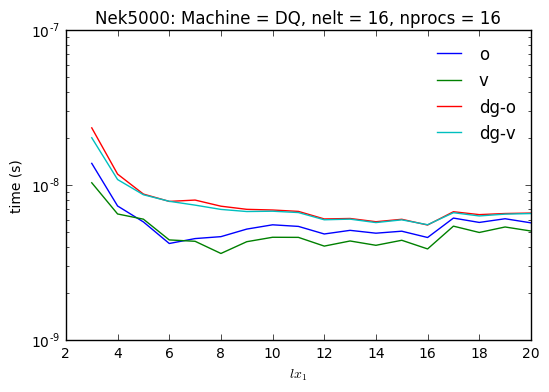

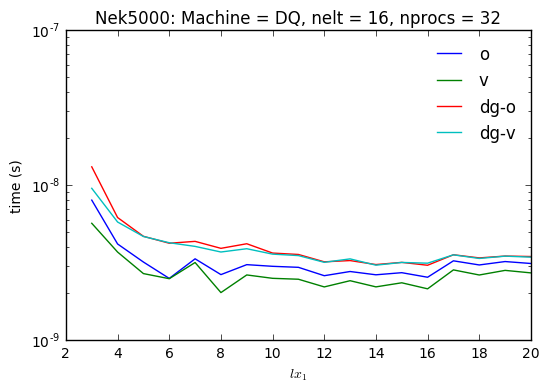

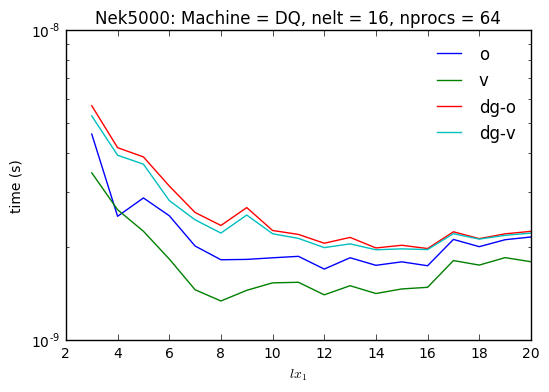

In [4]:
m = 'DQ'
for n in range(nelts):
    for p in range(nprocs[m]):
        plt.figure()
        for cg in cggo[m]:
            fname = m + '/dgv/' + m + '%02d' % (2**n) + 'P' + '%05d' % (2**p) + cg

            if os.path.exists(fname):
                meanNek5000, stdNek5000 = readdata(fname, nx1s = nx1s)

                plt.title('Nek5000: Machine = ' + m + ', nelt = %d'%(2**n) + 
                                                              ', nprocs = %d'%(2**p))
                nx1range = np.array([i for i in range(minnx1, maxnx1+1)])
                mask = np.isfinite(meanNek5000)

                plt.plot(nx1range[mask],meanNek5000[mask],label=cglabel(cg))
                plt.xlabel(r'$lx_1$')
                plt.ylabel('time (s)')
                plt.yscale('log')
                plt.legend(frameon=False, loc=0)